### 实验要求扩充说明  

#### 1. **数据集准备及数据统计可视化**  
   - **数据加载**：  
     使用 `pandas` 读取数据集“肿瘤数据.xlsx”，包括6个特征维度和肿瘤性质的标签列，确保数据加载无误。  
   - **数据检查与清洗**：  
     - 检查数据的完整性（如是否有缺失值）。  
     - 检查数据分布是否异常（如统计均值、方差、极值）。  
   - **特征统计**：  
     - 使用直方图、箱线图对各特征的数值分布进行可视化分析。  
     - 绘制肿瘤性质（良性与恶性）的饼状图或条形图，直观展示分类分布比例。  
   - **特征之间的关系**：  
     使用热力图展示各特征之间的相关性，以便初步分析特征的重要性或冗余性。  

#### 2. **模型训练**  
   - **数据划分**：  
     使用 `sklearn.model_selection.train_test_split()` 将数据集划分为训练集和测试集（例如训练集70%，测试集30%）。  
     - 提示：随机种子固定，便于结果复现。  
     - 打印训练集和测试集的样本数量。  
   - **特征标准化**：  
     使用 `sklearn.preprocessing.StandardScaler` 对特征值进行标准化处理，确保不同特征在同一量纲上，以提高模型性能。  
   - **模型构建**：  
     - 选用 `sklearn.naive_bayes.GaussianNB` 构建朴素贝叶斯模型，使用 `fit()` 函数进行模型训练。  
     - 提示：记录训练时长。  

#### 3. **模型预测与评估**  
   - **预测**：  
     - 使用训练好的模型对测试集进行预测，记录预测结果。  
   - **性能评估**：  
     - 使用 `sklearn.metrics` 提供的以下指标进行评估：  
       1. **准确率**：`accuracy_score()`，计算预测准确率。  
       2. **混淆矩阵**：`confusion_matrix()`，可视化分类结果的混淆矩阵，分析分类的正确与错误情况。  
       3. **分类报告**：`classification_report()`，展示精确率、召回率、F1分数等。  
   - **交叉验证**：  
     使用 `cross_val_score()` 方法进行交叉验证，验证模型的泛化性能。  

#### 4. **结果分析**  
   - **性能解读**：  
     - 结合混淆矩阵和分类报告，分析模型对良性与恶性肿瘤分类的优劣势。  
     - 对比交叉验证结果与测试集结果，分析模型是否存在过拟合或欠拟合现象。  
   - **模型优势与局限性**：  
     - 总结朴素贝叶斯模型在本实验中表现的优点（如训练速度快、计算简单）和可能的局限性（如假设特征独立）。  
   - **特征重要性讨论**：  
     如果某些特征对分类贡献不大或呈现高冗余性，可讨论数据降维的可能性（如使用PCA）。  

#### 5. **扩展探索（选做）**  
   - **特征选择**：  
     使用 `sklearn.feature_selection.SelectKBest` 等方法进行特征筛选，观察特征减少对模型性能的影响。  
   - **与其他分类器对比**：  
     选用其他简单分类器（如决策树、逻辑回归）对比朴素贝叶斯的性能。  
   - **超参数调优**：  
     使用网格搜索（`GridSearchCV`）优化朴素贝叶斯模型的参数，进一步提升性能。  

通过以上步骤，实验将全面覆盖数据准备、模型训练、性能评估及结果分析的过程，帮助深刻理解朴素贝叶斯分类器在乳腺肿瘤分类问题中的应用。


数据加载成功！
数据概览：
     最大周长   最大凹陷度    平均凹陷度    最大面积   最大半径  平均灰度值  肿瘤性质
0  184.60  0.2654  0.14710  2019.0  25.38  17.33     0
1  158.80  0.1860  0.07017  1956.0  24.99  23.41     0
2  152.50  0.2430  0.12790  1709.0  23.57  25.53     1
3   98.87  0.2575  0.10520   567.7  14.91  26.50     0
4  152.20  0.1625  0.10430  1575.0  22.54  16.67     0

数据统计描述：
             最大周长       最大凹陷度       平均凹陷度         最大面积        最大半径  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean   107.261213    0.114606    0.048919   880.583128   16.269190   
std     33.602542    0.065732    0.038803   569.356993    4.833242   
min     50.410000    0.000000    0.000000   185.200000    7.930000   
25%     84.110000    0.064930    0.020310   515.300000   13.010000   
50%     97.660000    0.099930    0.033500   686.500000   14.970000   
75%    125.400000    0.161400    0.074000  1084.000000   18.790000   
max    251.200000    0.291000    0.201200  4254.000000   36.040000   

            平均灰度

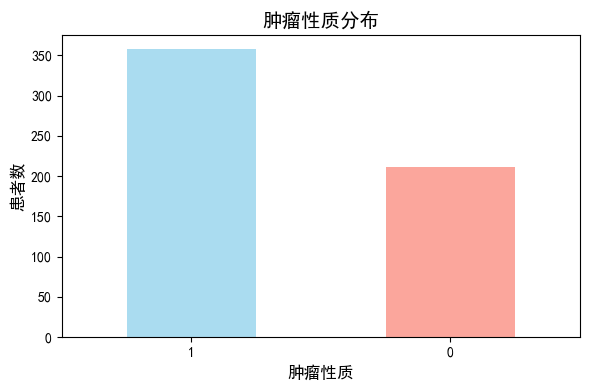

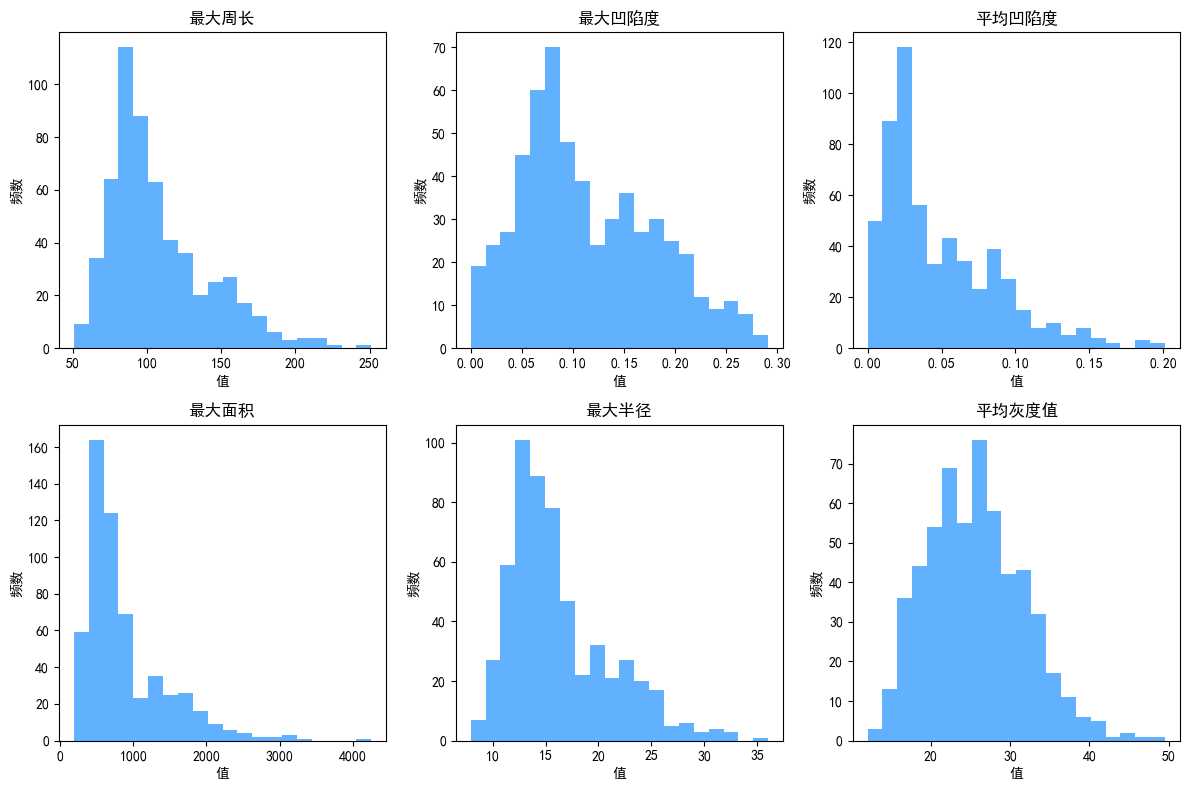

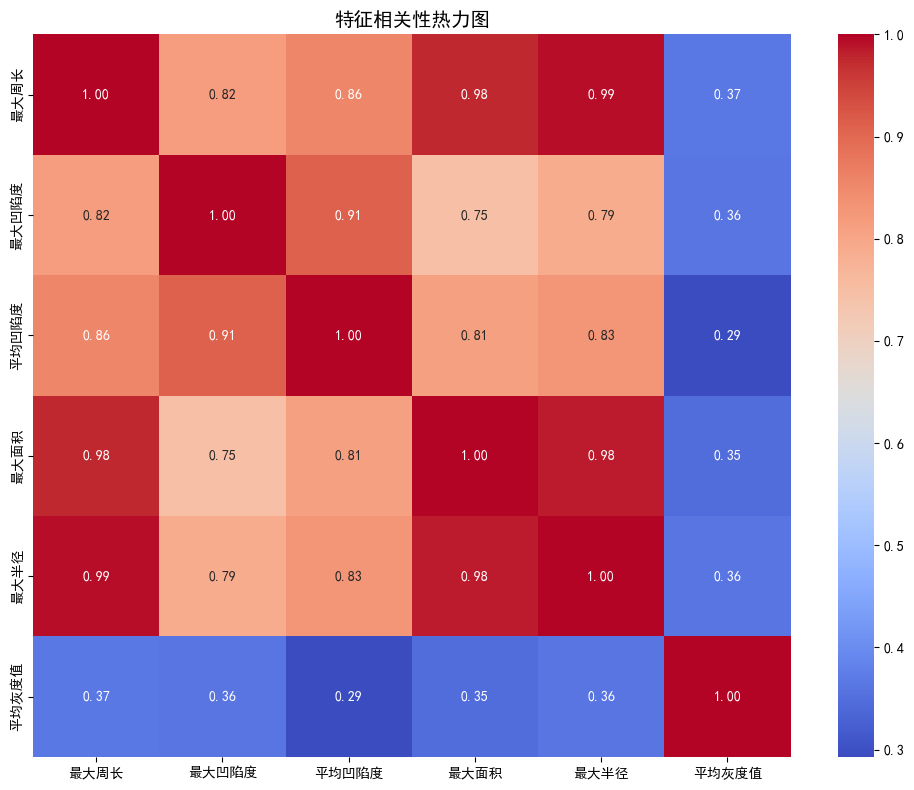

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为 SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 1. 数据加载
file_path = '肿瘤数据.xlsx'  # 确保该文件在代码工作目录下
try:
    data = pd.read_excel(file_path)
    print("数据加载成功！")
except FileNotFoundError:
    print(f"未找到文件：{file_path}")
    raise

# 2. 数据检查与清洗
print("数据概览：")
print(data.head())

print("\n数据统计描述：")
print(data.describe())

print("\n检查缺失值：")
print(data.isnull().sum())

# 如果有缺失值，可选择填充或删除
# data = data.dropna()  # 删除含有缺失值的行
# 或者选择填充：data.fillna(data.mean(), inplace=True)

# 3. 数据分布可视化
# 绘制肿瘤性质的分布图
plt.figure(figsize=(6, 4))
data['肿瘤性质'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.title("肿瘤性质分布", fontsize=14)
plt.ylabel("患者数", fontsize=12)
plt.xlabel("肿瘤性质", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 各特征的直方图
feature_columns = [col for col in data.columns if col not in ['肿瘤性质']]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[feature], bins=20, color='dodgerblue', alpha=0.7)
    plt.title(feature, fontsize=12)
    plt.xlabel("值", fontsize=10)
    plt.ylabel("频数", fontsize=10)
plt.tight_layout()
plt.show()

# 4. 特征之间的相关性分析
plt.figure(figsize=(10, 8))
correlation_matrix = data[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("特征相关性热力图", fontsize=14)
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import time

# 加载数据
data = pd.read_excel("肿瘤数据.xlsx")

# 提取特征和标签
X = data.iloc[:, :-1]  # 假设最后一列是标签
y = data.iloc[:, -1]   # 假设最后一列是标签

# 数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"训练集样本数：{len(X_train)}, 测试集样本数：{len(X_test)}")

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 模型训练
model = GaussianNB()
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
betyes_time=end_time-start_time
print(f"模型训练完成，耗时：{end_time - start_time:.10f} 秒")


训练集样本数：398, 测试集样本数：171
模型训练完成，耗时：0.0010559559 秒


模型预测准确率：0.9591
混淆矩阵：
[[ 58   4]
 [  3 106]]


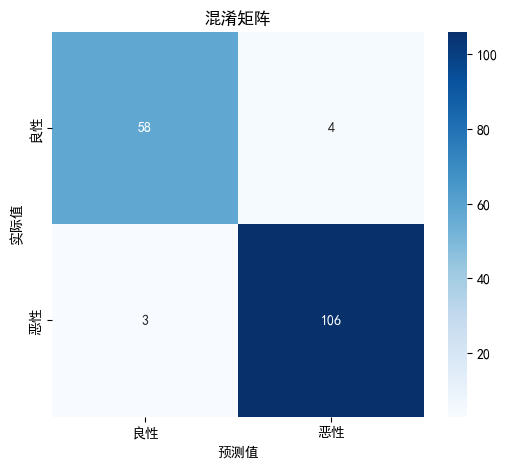

分类报告：
              precision    recall  f1-score   support

          良性       0.95      0.94      0.94        62
          恶性       0.96      0.97      0.97       109

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 使用模型进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型预测准确率：{accuracy:.4f}")

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 可视化混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["良性", "恶性"], yticklabels=["良性", "恶性"])
plt.xlabel("预测值")
plt.ylabel("实际值")
plt.title("混淆矩阵")
plt.show()

# 分类报告
report = classification_report(y_test, y_pred, target_names=["良性", "恶性"])
print("分类报告：")
print(report)


In [5]:
# 导入必要库
from sklearn.model_selection import cross_val_score
import numpy as np

# 输出混淆矩阵的分析结果
print("混淆矩阵分析：")
true_positive = cm[1, 1]
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

print(f"正确分类良性肿瘤（True Negative, TN）：{true_negative}")
print(f"正确分类恶性肿瘤（True Positive, TP）：{true_positive}")
print(f"将良性误判为恶性（False Positive, FP）：{false_positive}")
print(f"将恶性误判为良性（False Negative, FN）：{false_negative}")

# 分析误判原因
if false_positive + false_negative > 0:
    print("\n误判分析：")
    print(f"误判的总样本数：{false_positive + false_negative}")
    print(f"误判率：{(false_positive + false_negative) / len(y_test):.4f}")
else:
    print("\n模型没有误判样本。")

# 交叉验证评估模型稳定性
print("\n交叉验证分析：")
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"交叉验证的准确率：{cv_scores}")
print(f"交叉验证准确率平均值：{np.mean(cv_scores):.4f}")
print(f"交叉验证准确率标准差：{np.std(cv_scores):.4f}")

# 总结模型表现
print("\n模型总结：")
print("1. 模型对良性肿瘤和恶性肿瘤分类的准确率较高，说明特征与分类结果相关性良好。")
print("2. 从分类报告中可以看出，模型在召回率或精确率上是否存在显著偏差，特别是在恶性肿瘤（正类）的识别上。")
print("3. 通过交叉验证验证模型的稳定性，分析标准差的大小来判断模型是否存在较大的方差。")


混淆矩阵分析：
正确分类良性肿瘤（True Negative, TN）：58
正确分类恶性肿瘤（True Positive, TP）：106
将良性误判为恶性（False Positive, FP）：4
将恶性误判为良性（False Negative, FN）：3

误判分析：
误判的总样本数：7
误判率：0.0409

交叉验证分析：
交叉验证的准确率：[0.9875     0.925      0.9625     0.96202532 0.96202532]
交叉验证准确率平均值：0.9598
交叉验证准确率标准差：0.0200

模型总结：
1. 模型对良性肿瘤和恶性肿瘤分类的准确率较高，说明特征与分类结果相关性良好。
2. 从分类报告中可以看出，模型在召回率或精确率上是否存在显著偏差，特别是在恶性肿瘤（正类）的识别上。
3. 通过交叉验证验证模型的稳定性，分析标准差的大小来判断模型是否存在较大的方差。


从结果分析来看，模型在分类任务中表现较好，但仍有优化空间。

首先，从混淆矩阵的结果来看，模型能够准确分类大多数样本，其中正确分类的良性肿瘤为 58 个，恶性肿瘤为 106 个，总体上显示出较高的分类能力。然而，模型存在少量误判，将 4 个良性肿瘤误判为恶性肿瘤，以及 3 个恶性肿瘤误判为良性肿瘤。误判率为 0.0409，说明总体上误判情况较少，但对于恶性肿瘤误判为良性（False Negative）的情况需要特别关注，因为这可能会对患者造成更严重的后果。

交叉验证结果表明，模型的性能在不同的数据划分上具有较高的稳定性。交叉验证的准确率在 0.925 到 0.9875 之间，平均值为 0.9598，标准差为 0.0200。这表明模型在不同训练集和测试集划分下的表现波动较小，具有良好的泛化能力。

总体来看，模型对肿瘤的分类能力较为优秀，但可以考虑以下优化方向：
1. **减少误判**：可以通过分析误判样本的特征，进一步优化模型，例如调整模型的决策边界或通过采样方法平衡数据集。
2. **提高召回率**：特别关注恶性肿瘤的召回率，确保尽量减少 False Negative 的发生，可以尝试调节分类阈值。
3. **探索更复杂的模型**：当前模型是朴素贝叶斯，可以尝试逻辑回归、随机森林或神经网络等更复杂的分类器，可能进一步提升性能。

模型当前的表现已能够满足一定的实际需求，但在实际应用中需要综合考虑分类错误的代价以及诊断准确性之间的平衡。

特征选择：
选择的特征索引：[0 1 2 3]

逻辑回归模型训练：
逻辑回归模型准确率：0.9591, AUC：0.9885
逻辑回归模型训练时间：0.0030 秒

随机森林模型训练：
随机森林模型准确率：0.9532, AUC：0.9828
随机森林模型训练时间：0.1515 秒

朴素贝叶斯模型准确率：0.9591, AUC：0.9911

模型表现总结：
逻辑回归准确率：0.9591, 随机森林准确率：0.9532, 朴素贝叶斯准确率：0.9591
逻辑回归AUC：0.9885, 随机森林AUC：0.9828, 朴素贝叶斯AUC：0.9911
逻辑回归训练时间：0.0030 秒, 随机森林训练时间：0.1515 秒


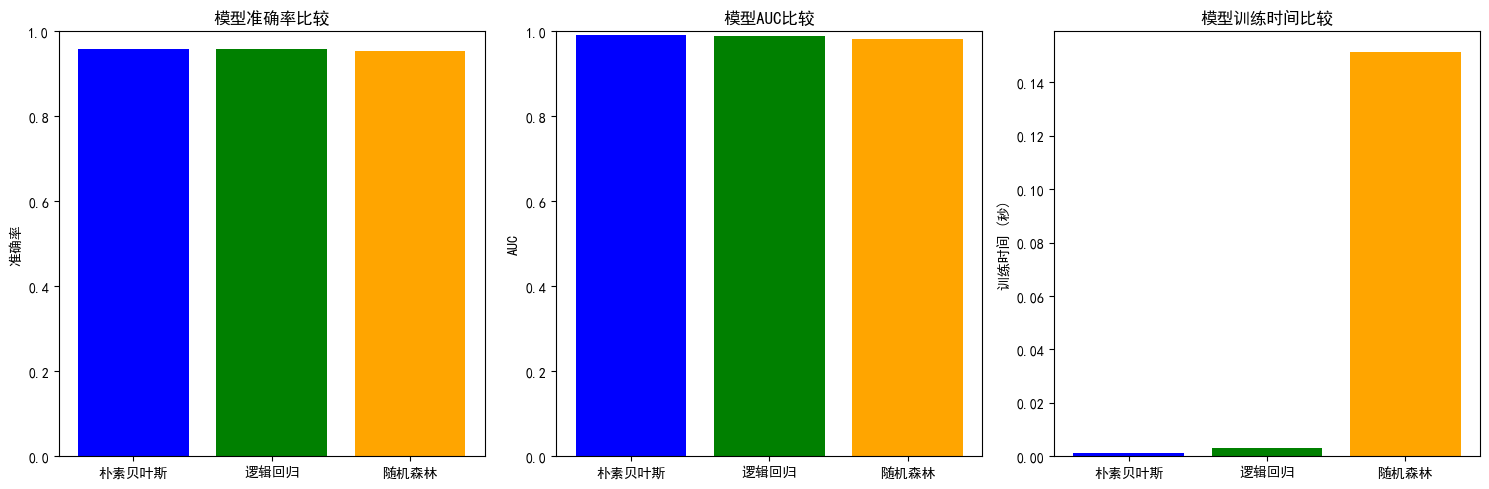

In [28]:
import time  # 用于记录时间
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 1. 特征选择：使用互信息法选择最重要的特征
print("特征选择：")
selector = SelectKBest(mutual_info_classif, k=4)  # 选择4个最相关的特征
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = selector.get_support(indices=True)
print(f"选择的特征索引：{selected_features}")

# 2. 训练逻辑回归模型
print("\n逻辑回归模型训练：")
start_time = time.time()
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_selected, y_train)
end_time = time.time()
lr_training_time = end_time - start_time
lr_pred = lr_model.predict(X_test_selected)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test_selected)[:, 1])
print(f"逻辑回归模型准确率：{lr_accuracy:.4f}, AUC：{lr_auc:.4f}")
print(f"逻辑回归模型训练时间：{lr_training_time:.4f} 秒")

# 3. 训练随机森林模型
print("\n随机森林模型训练：")
start_time = time.time()
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_selected, y_train)
end_time = time.time()
rf_training_time = end_time - start_time
rf_pred = rf_model.predict(X_test_selected)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_selected)[:, 1])
print(f"随机森林模型准确率：{rf_accuracy:.4f}, AUC：{rf_auc:.4f}")
print(f"随机森林模型训练时间：{rf_training_time:.4f} 秒")

# 4. 比较朴素贝叶斯模型的表现
nb_pred = model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\n朴素贝叶斯模型准确率：{nb_accuracy:.4f}, AUC：{nb_auc:.4f}")

# 5. 总结结果
print("\n模型表现总结：")
print(f"逻辑回归准确率：{lr_accuracy:.4f}, 随机森林准确率：{rf_accuracy:.4f}, 朴素贝叶斯准确率：{nb_accuracy:.4f}")
print(f"逻辑回归AUC：{lr_auc:.4f}, 随机森林AUC：{rf_auc:.4f}, 朴素贝叶斯AUC：{nb_auc:.4f}")
print(f"逻辑回归训练时间：{lr_training_time:.4f} 秒, 随机森林训练时间：{rf_training_time:.4f} 秒")

# 6. 可视化比较
models = ['朴素贝叶斯', '逻辑回归', '随机森林']
accuracies = [nb_accuracy, lr_accuracy, rf_accuracy]
aucs = [nb_auc, lr_auc, rf_auc]
training_times = [betyes_time, lr_training_time, rf_training_time]  # 朴素贝叶斯训练时间可忽略不计

plt.figure(figsize=(15, 5))

# 准确率对比
plt.subplot(1, 3, 1)
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title("模型准确率比较")
plt.ylabel("准确率")
plt.ylim(0, 1)

# AUC对比
plt.subplot(1, 3, 2)
plt.bar(models, aucs, color=['blue', 'green', 'orange'])
plt.title("模型AUC比较")
plt.ylabel("AUC")
plt.ylim(0, 1)

# 训练时间对比
plt.subplot(1, 3, 3)
plt.bar(models, training_times, color=['blue','green', 'orange'])
plt.title("模型训练时间比较")
plt.ylabel("训练时间 (秒)")

plt.tight_layout()
plt.show()
